In [5]:
import numpy as np
import pandas as pd

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix

from sklearn.linear_model import LinearRegression
#instital importent regrission model api

from sklearn import metrics
# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# Load data set

In [6]:
data = pd.read_csv("NASA_airfoil_self_noise.csv")
data.head(5)

,Frequency,AngleAttack,ChordLength,FreeStreamVelocity,SuctionSide,Sound
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


# Removing column

data = pd.read_csv('Credit.csv').drop('Unnamed: 0', axis=1).dropna()
data.head(2)

In [6]:
#data = data[["Income","Limit","Rating","Cards","Age" ,"Education","Gender","Student","Married","Ethnicity","Balance"]]     
#data.head(2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
Frequency             1503 non-null int64
AngleAttack           1503 non-null float64
ChordLength           1503 non-null float64
FreeStreamVelocity    1503 non-null float64
SuctionSide           1503 non-null float64
Sound                 1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


In [8]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.
# we use np.isreal a numpy function which checks each column for each row and returns a bool array, 
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

#data[~data.applymap(np.isreal).all(1)]

In [9]:
# replace the missing values in pima_df with median value :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively
data = data.fillna(data.median())
data.head(2)

,Frequency,AngleAttack,ChordLength,FreeStreamVelocity,SuctionSide,Sound
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201


In [10]:
#Lets analysze the distribution of the various attributes  
#transpose() or we can write T
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Frequency,1503.0,2886.380572,3152.573137,200.000000,800.000000,1600.000000,4000.000000,20000.000000
AngleAttack,1503.0,6.782302,5.918128,0.000000,2.000000,5.400000,9.900000,22.200000
ChordLength,1503.0,0.136548,0.093541,0.025400,0.050800,0.101600,0.228600,0.304800
FreeStreamVelocity,1503.0,50.860745,15.572784,31.700000,39.600000,39.600000,71.300000,71.300000
SuctionSide,1503.0,0.011140,0.013150,0.000401,0.002535,0.004957,0.015576,0.058411
Sound,1503.0,124.835943,6.898657,103.380000,120.191000,125.721000,129.995500,140.987000


# converting to categarical to numarical variable


In [11]:
data_complete = pd.get_dummies(data,drop_first = True)
data_complete.head(2)

,Frequency,AngleAttack,ChordLength,FreeStreamVelocity,SuctionSide,Sound
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201


# Explore the dataset
Is there in relashinship between dependent variables and spend various independent variables? Load matlplolib and seaborn for visuval analytics

C:\Users\Name\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Name\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


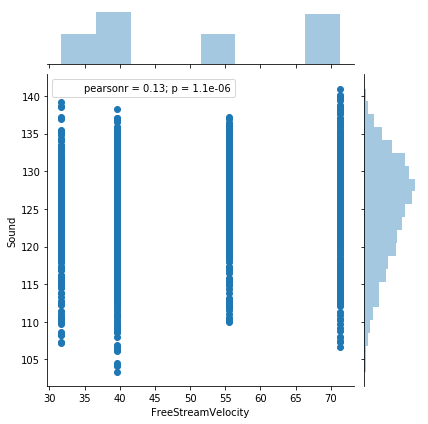

In [23]:
sns.jointplot(data_complete.FreeStreamVelocity,data_complete.Sound)

# Observe the graph: 
                   1.person correlation is 0.46 .
                   2.Observe the p value is 1e-22.
                   Here we are testing whethere correlation between income and balance is zero (Null hypothesis) or                                not(alternate hypothesis).since p value is insignificate,we reject the null hypothesis.

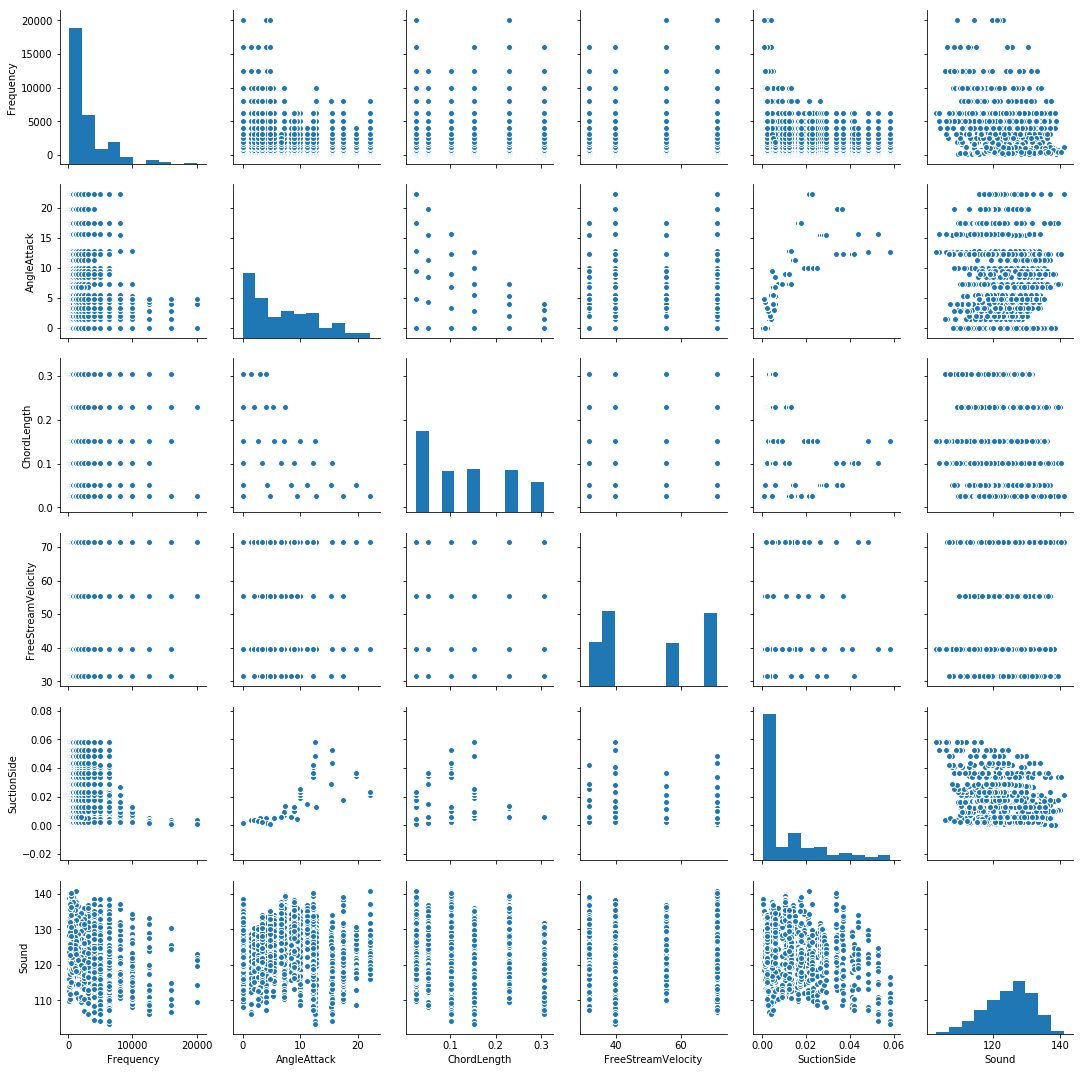

In [26]:
# Pairplot using sns

sns.pairplot(data_complete)

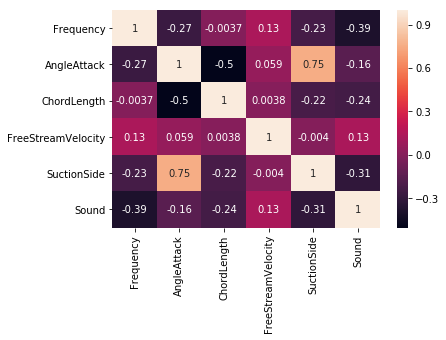

In [27]:
#sns.heatmap(data.corr(),annot=True)

sns.heatmap(data_complete.corr(),annot=True)


# Obsrevation:

1.The diagonal of the above matrix shows the auto_correlation of the variance .Its is always 1. We can observe that 
the correlation between income,range and balance is highest i.e 0.79.

2.Correlaton can be vary from -1 and +1 .Closer to +1 means strong positive correlation and close -1 means
strong negativve correlation . Closer to 0 means not very strong correlation . Variables with strong 
correlations are mostly probabily candidtes for the model bulding.    

In [28]:
data_complete.columns

Index(['Frequency', 'AngleAttack', 'ChordLength', 'FreeStreamVelocity',
       'SuctionSide', 'Sound'],
      dtype='object')

# separeting the data into train and test data and do analysis

In [46]:
x = data_complete.drop('Sound',axis=1)
y = data_complete[['Sound']]

In [47]:
#help(train_test_split)

In [65]:
seed = 9
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = seed)

In [66]:
x_train.info()
#y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 9 to 382
Data columns (total 5 columns):
Frequency             1052 non-null int64
AngleAttack           1052 non-null float64
ChordLength           1052 non-null float64
FreeStreamVelocity    1052 non-null float64
SuctionSide           1052 non-null float64
dtypes: float64(4), int64(1)
memory usage: 49.3 KB


In [67]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

# MODEL LINEAR REGRISSION

In [68]:
model = LinearRegression()

In [69]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
print("R^2:",model.score(x_train,y_train))
predictivebalance = model.predict(x_train)
mse = metrics.mean_squared_error(predictivebalance,y_train)#10-rmse,10+rmse
rmse = np.sqrt(mse)#+-3.24 pedictive sales-rmse+predictive sales
print("MSE:",mse)
print("RMSE_persentage:",rmse/np.mean(y_train.Sound)*100)


R^2: 0.5014665589568553
MSE: 23.141889708359123
RMSE_persentage: 3.855792787998898


In [71]:
print("R^2:",model.score(x_test,y_test))
predictivebalance = model.predict(x_test)
mse = metrics.mean_squared_error(predictivebalance,y_test)#10-rmse,10+rmse
rmse = np.sqrt(mse)#+-3.24 pedictive sales-rmse+predictive sales
print("MSE:",mse)
print("RMSE_persentage:",rmse/np.mean(y_test.Sound)*100)#errror persentage.
#rmse persentage


R^2: 0.5420708099699534
MSE: 22.977628005170637
RMSE_persentage: 3.8346102607287014


# Adjusted R^2

In [72]:
def AdjRsquare(model,x,y):
    Rsquare = model.score(x,y)
    NoData = len(y)
    p = x.shape[1]
    tempRsquare = 1-(1-Rsquare)*(NoData-1)/(NoData-p-1)
    return tempRsquare

In [73]:
AdjRsquare(model,x_train,y_train)

0.49908351191554

In [74]:
AdjRsquare(model,x_test,y_test)

0.536925538171863

# combine the all the steps to test model performance

In [75]:
def linregcheckmodelPerformance(x,y):
    model = LinearRegression()
    seed = 9
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = seed)
    model.fit(x_train,y_train)
    # Train Accuracies
    trainR2 = model.score(x_train,y_train)
    predictivebalance = model.predict(x_train)
    mse = metrics.mean_squared_error(predictivebalance,y_train)#10-rmse,10+rmse
    trainRmse = np.sqrt(mse)#+-3.24 pedictive sales-rmse+predictive sale
    trainRmsePct = trainRmse/np.mean(np.mean(np.mean(y_train.Sound)))*100
    trianAdjR2 = AdjRsquare(model,x_train,y_train)
    trainAccuracies = [len(y_train),trainRmse,trainRmsePct,trainR2,trianAdjR2]
     # test Accuracies
    testR2 = model.score(x_test,y_test)
    predictivebalance = model.predict(x_test)
    mse = metrics.mean_squared_error(predictivebalance,y_test)#10-rmse,10+rmse
    testRmse = np.sqrt(mse)#+-3.24 pedictive sales-rmse+predictive sale
    testRmsePct = testRmse/np.mean(np.mean(np.mean(y_test.Sound)))*100
    testAdjR2 = AdjRsquare(model,x_test,y_test)
    testAccuracies = [len(y_test),testRmse,testRmsePct,testR2,testAdjR2]
    #cCreate dataframe foe result
    resultDf = pd.DataFrame(index=["Datasize","RMSE","RMSEPCT","R^2","ADJR^2"])
    resultDf['Train_Data'] = trainAccuracies
    resultDf['Test_Data'] = testAccuracies
    return(round(resultDf,4))

In [76]:
linregcheckmodelPerformance(x,y)

,Train_Data,Test_Data
Datasize,1052.0000,451.0000
RMSE,4.8106,4.7879
RMSEPCT,3.8558,3.8301
R^2,0.5015,0.5431
ADJR^2,0.4991,0.5380


In [77]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#VIF Factor
def myVIFfun(x):
    data_mat = x.as_matrix()
    vif = [variance_inflation_factor(data_mat,i)
            for i in range(data_mat.shape[1])]
    vif_factor = pd.DataFrame()
    vif_factor["Balance"] = x.columns#list(x.columns)
    vif_factor["vif"] = vif
    return vif_factor 
myVIFfun(x)    

C:\Users\Name\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


,Balance,vif
0,Frequency,1.942627
1,AngleAttack,6.557489
2,ChordLength,3.254447
3,FreeStreamVelocity,7.148723
4,SuctionSide,4.299617


In [78]:
linregcheckmodelPerformance(x,y)

,Train_Data,Test_Data
Datasize,1052.0000,451.0000
RMSE,4.8106,4.7879
RMSEPCT,3.8558,3.8301
R^2,0.5015,0.5431
ADJR^2,0.4991,0.5380
